Import necessary modules into our project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


Read in the Iris dataset and view its data.

In [2]:
df = pd.read_csv('iris.csv')

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Generate a Dendrogram to visual the dataset for Hierarchical Clustering.

For the terms "linkage" and "ward", refer to this article - https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-1-theory-linkage-and-affinity-e3b6a4817702 

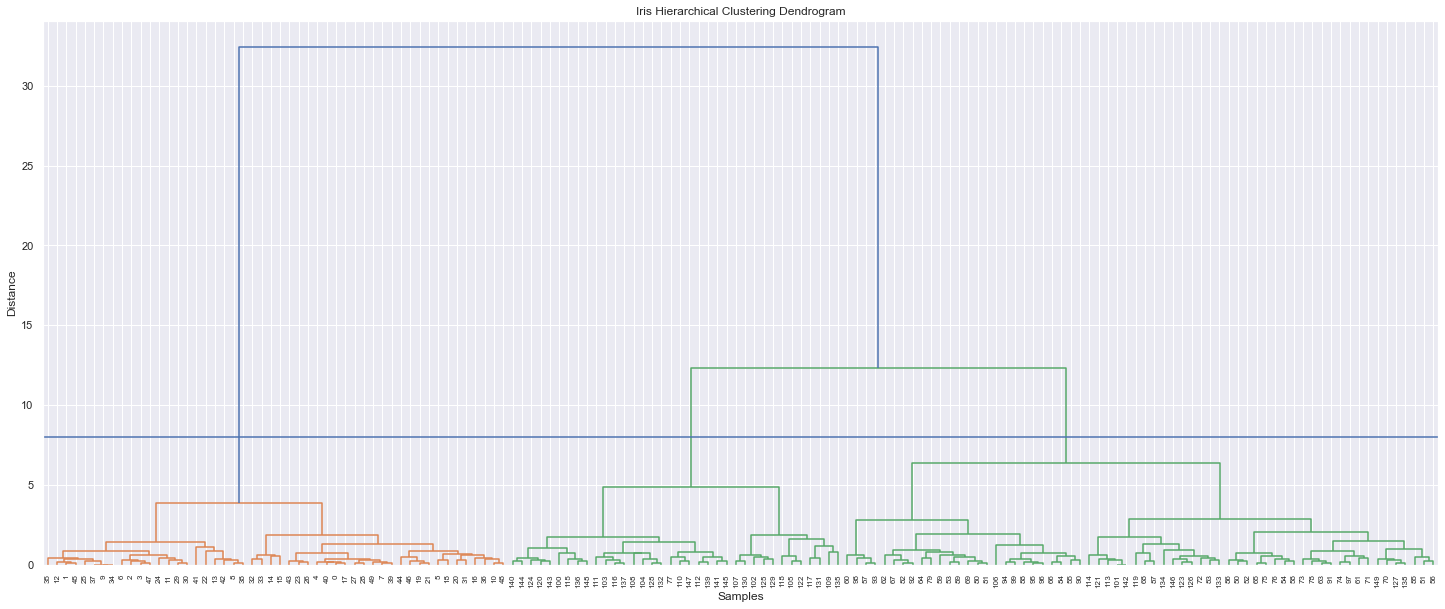

In [3]:
X = df.iloc[:, 1:-1].values    # remove first and last columns

sb.set(style='darkgrid')

plt.figure(figsize=(25, 10))

dendrogram(
    linkage(X, 'ward'),  # generate the linkage matrix
    leaf_font_size=8     # font size for the x axis labels
)

plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

plt.axhline(y=8)    # we have 3 clusters (intersections) at a distance of 8 units
plt.show()


Generate cluster-assignments using Hierarchical Clustering.

In [22]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clusters = clustering.fit_predict(X)

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Plot the cluster-assignments.

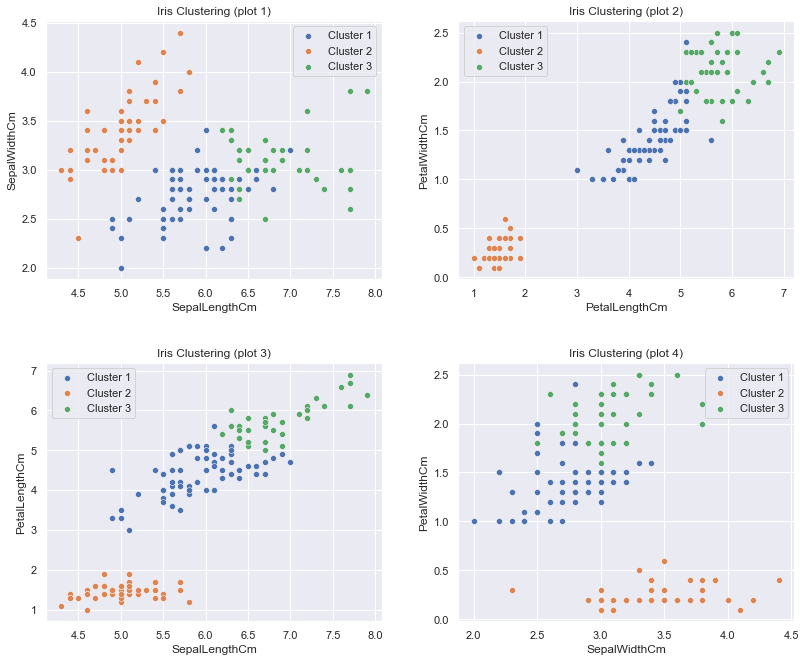

In [17]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for i in np.unique(clusters):
    bool_arr = (clusters == i)
    sb.scatterplot(x=X[bool_arr,0], y=X[bool_arr,1],
        label='Cluster ' + str(i+1), ax=ax[0,0])
    sb.scatterplot(x=X[bool_arr,2], y=X[bool_arr,3],
        label='Cluster ' + str(i+1), ax=ax[0,1])
    sb.scatterplot(x=X[bool_arr,0], y=X[bool_arr,2],
        label='Cluster ' + str(i+1), ax=ax[1,0])
    sb.scatterplot(x=X[bool_arr,1], y=X[bool_arr,3],
        label='Cluster ' + str(i+1), ax=ax[1,1])

ax[0,0].set_xlabel('SepalLengthCm')
ax[0,0].set_ylabel('SepalWidthCm')
ax[0,0].set_title('Iris Clustering (plot 1)')

ax[0,1].set_xlabel('PetalLengthCm')
ax[0,1].set_ylabel('PetalWidthCm')
ax[0,1].set_title('Iris Clustering (plot 2)')

ax[1,0].set_xlabel('SepalLengthCm')
ax[1,0].set_ylabel('PetalLengthCm')
ax[1,0].set_title('Iris Clustering (plot 3)')

ax[1,1].set_xlabel('SepalWidthCm')
ax[1,1].set_ylabel('PetalWidthCm')
ax[1,1].set_title('Iris Clustering (plot 4)')

plt.tight_layout(pad=3)
plt.show()
